### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

Motivation : To predict number of children born in a dataset containing fertility data of women in     Botswana.This data comes from UN Fertility report in Sub-Saharan Africa. It contains 4361 observations on 27 variables with 208 missing values.We have 47 features and we have processed 37 features

In [1]:
'''A data.frame with 4361 observations on 27 variables: Fertility data from Botswana
Dependent variable: No. of living children or no. of children ever born

mnthborn: month woman born
yearborn: year woman born
age: age in years
electric: =1 if has electricity
radio: =1 if has radio
tv: =1 if has tv
bicycle: =1 if has bicycle
educ: years of education
ceb: children ever born
agefbrth: age at first birth
children: number of living children
knowmeth: =1 if know about birth control
usemeth: =1 if ever use birth control
monthfm: month of first marriage
yearfm: year of first marriage
agefm: age at first marriage
idlnchld: 'ideal' number of children
heduc: husband's years of education
agesq: age^2
urban: =1 if live in urban area
urb_educ: urban*educ
spirit: =1 if religion == spirit
protest: =1 if religion == protestant
catholic: =1 if religion == catholic
frsthalf: =1 if mnthborn <= 6
educ0: =1 if educ == 0
evermarr: =1 if ever married'''

"A data.frame with 4361 observations on 27 variables: Fertility data from Botswana\nDependent variable: No. of living children or no. of children ever born\n\nmnthborn: month woman born\nyearborn: year woman born\nage: age in years\nelectric: =1 if has electricity\nradio: =1 if has radio\ntv: =1 if has tv\nbicycle: =1 if has bicycle\neduc: years of education\nceb: children ever born\nagefbrth: age at first birth\nchildren: number of living children\nknowmeth: =1 if know about birth control\nusemeth: =1 if ever use birth control\nmonthfm: month of first marriage\nyearfm: year of first marriage\nagefm: age at first marriage\nidlnchld: 'ideal' number of children\nheduc: husband's years of education\nagesq: age^2\nurban: =1 if live in urban area\nurb_educ: urban*educ\nspirit: =1 if religion == spirit\nprotest: =1 if religion == protestant\ncatholic: =1 if religion == catholic\nfrsthalf: =1 if mnthborn <= 6\neduc0: =1 if educ == 0\nevermarr: =1 if ever married"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("fertil2.csv")
df.head()

,index,mnthborn,yearborn,age,electric,radio,tv,bicycle,educ,ceb,...,heduc,agesq,urban,urb_educ,spirit,protest,catholic,frsthalf,educ0,evermarr
0,0,5,64,24,1.0,1.0,1.0,1.0,12,0,...,NaN,576,1,12,0,0,0,1,0,0
1,1,1,56,32,1.0,1.0,1.0,1.0,13,3,...,12.0,1024,1,13,0,0,0,1,0,1
2,2,7,58,30,1.0,0.0,0.0,0.0,5,1,...,7.0,900,1,5,1,0,0,0,0,1
3,3,11,45,42,1.0,0.0,1.0,0.0,4,3,...,11.0,1764,1,4,0,0,0,0,0,1
4,4,5,45,43,1.0,1.0,1.0,1.0,11,2,...,14.0,1849,1,11,0,1,0,1,0,1


## Exploring data set

In [4]:
df.shape

(4361, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 28 columns):
index       4361 non-null int64
mnthborn    4361 non-null int64
yearborn    4361 non-null int64
age         4361 non-null int64
electric    4358 non-null float64
radio       4359 non-null float64
tv          4359 non-null float64
bicycle     4358 non-null float64
educ        4361 non-null int64
ceb         4361 non-null int64
agefbrth    3273 non-null float64
children    4361 non-null int64
knowmeth    4354 non-null float64
usemeth     4290 non-null float64
monthfm     2079 non-null float64
yearfm      2079 non-null float64
agefm       2079 non-null float64
idlnchld    4241 non-null float64
heduc       1956 non-null float64
agesq       4361 non-null int64
urban       4361 non-null int64
urb_educ    4361 non-null int64
spirit      4361 non-null int64
protest     4361 non-null int64
catholic    4361 non-null int64
frsthalf    4361 non-null int64
educ0       4361 non-null int64
everm

In [6]:
df = df.drop(['index', 'mnthborn' ,'yearborn' ,'monthfm' ,'yearfm' ,'monthfm', 'yearfm', 'agefm' ,'heduc','agefbrth'],1)

In [7]:
df.isna().sum()

age           0
electric      3
radio         2
tv            2
bicycle       3
educ          0
ceb           0
children      0
knowmeth      7
usemeth      71
idlnchld    120
agesq         0
urban         0
urb_educ      0
spirit        0
protest       0
catholic      0
frsthalf      0
educ0         0
evermarr      0
dtype: int64

In [8]:
df.isnull().sum().sum()

208

In [9]:
df=df.fillna(df.median())

In [10]:
df.isnull().sum().sum()

0

In [11]:
#coverting into categories
df["electric"] = df["electric"].astype("category")
df["radio"] = df["radio"].astype("category")
df["tv"] = df["tv"].astype("category")
df["bicycle"] = df["bicycle"].astype("category")
df["knowmeth"] = df["knowmeth"].astype("category")
df["knowmeth"] = df["knowmeth"].astype("category")
df["usemeth"] = df["usemeth"].astype("category")
df["protest"] = df["protest"].astype("category")
df["catholic"] = df["catholic"].astype("category")
df["frsthalf"] = df["frsthalf"].astype("category")
df["educ0"] = df["educ0"].astype("category")
df["evermarr"] = df["evermarr"].astype("category")
df["spirit"] = df["spirit"].astype("category")

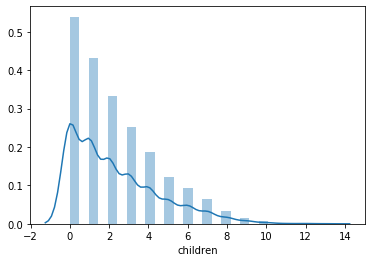

In [12]:
import seaborn as sns
%matplotlib inline
sns.distplot((df.dropna())["children"] )

# BAGGING REGRESSOR FOR LINEAR REGRESSOR

In [13]:
y = df["children"]
X = df.drop(["children", "ceb"], 1)
X_train_org , X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

l_reg_2 = LinearRegression()
bag_reg_2 = BaggingRegressor(l_reg_2, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_reg_2.fit(X_train, y_train)
y_pred_bag_2 = bag_reg_2.predict(X_test)

In [14]:
from sklearn import metrics

print("Mean Squared error: ", metrics.mean_squared_error(y_test, y_pred_bag_2))

Mean Squared error:  1.8687066272334263


In [15]:
print("R-Square score: ", metrics.r2_score(y_test, y_pred_bag_2))

R-Square score:  0.606958660402386


In [16]:
l_reg_2 = LinearRegression()
l_reg_2.fit(X_train, y_train)
y_pred_l_reg = l_reg_2.predict(X_test)

print("R-Square score: ", metrics.r2_score(y_test,y_pred_l_reg))

R-Square score:  0.6072798652946318


Text(0.5, 1.0, 'Scatter Plot for Linear Regressor with bagging')

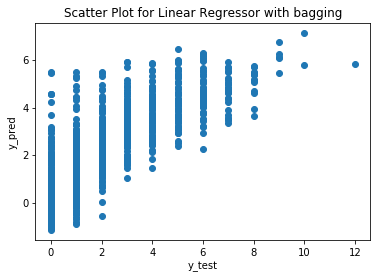

In [17]:
plt.scatter(y_test, y_pred_bag_2)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Scatter Plot for Linear Regressor with bagging")

Text(0.5, 1.0, 'Scatter Plot for Linear Regressor without bagging')

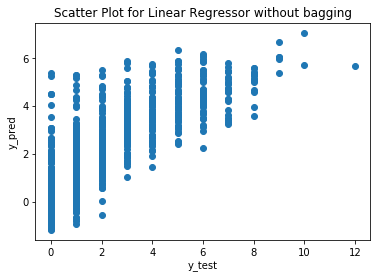

In [18]:
plt.scatter(y_test, y_pred_l_reg)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Scatter Plot for Linear Regressor without bagging")

In [19]:
#As we can see Bagging DOES NOT increase score of Linear Regression.

# Bagging for KNN Regressor

In [20]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
bag_reg_1 = BaggingRegressor(knn, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_reg_1.fit(X_train, y_train)
y_pred_bag_1 = bag_reg_1.predict(X_test)

In [21]:
from sklearn import metrics

print("Mean Squared error: ", metrics.mean_squared_error(y_test, y_pred_bag_1))

Mean Squared error:  2.1052752403207333


In [22]:
print("R-Square score: ", metrics.r2_score(y_test,y_pred_bag_1))

R-Square score:  0.5572016556165458


In [23]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("R-Square score: ", metrics.r2_score(y_test,y_pred_knn))

R-Square score:  0.5279497483942436


Text(0.5, 1.0, 'Scatter Plot for knn  Regressor with bagging')

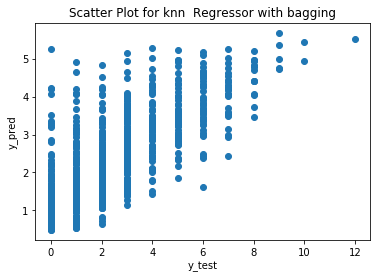

In [24]:
plt.scatter(y_test, y_pred_bag_1)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Scatter Plot for knn  Regressor with bagging")

Text(0.5, 1.0, 'Scatter Plot for knn Regressor without bagging')

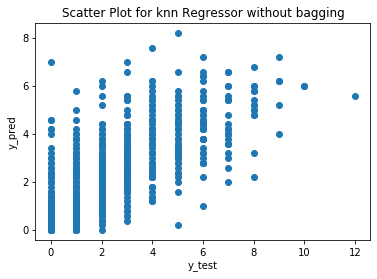

In [25]:
plt.scatter(y_test, y_pred_knn)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Scatter Plot for knn Regressor without bagging")

# Pasting for Linear Regression

In [26]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

l_reg_2 = LinearRegression()
bag_reg_2 = BaggingRegressor(l_reg_2, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_reg_2.fit(X_train, y_train)
y_pred_bag_2 = bag_reg_2.predict(X_test)

In [27]:
from sklearn import metrics

print("Mean Squared error: ", metrics.mean_squared_error(y_test, y_pred_bag_2))

Mean Squared error:  1.8764063236982211


In [28]:
print("R-Square score: ", metrics.r2_score(y_test,y_pred_bag_2))

R-Square score:  0.6053391985944625


In [29]:
l_reg_2 = LinearRegression()
l_reg_2.fit(X_train, y_train)
y_pred_l_reg_2 = l_reg_2.predict(X_test)

print("R-Square score: ", metrics.r2_score(y_test,y_pred_l_reg_2))

R-Square score:  0.6072798652946318


Text(0.5, 1.0, 'Scatter Plot for lineat Regressor with pasting')

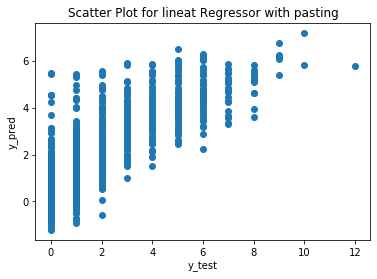

In [30]:
plt.scatter(y_test, y_pred_bag_2)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Scatter Plot for lineat Regressor with pasting")

Text(0.5, 1.0, 'Scatter Plot for linear Regressor without pasting')

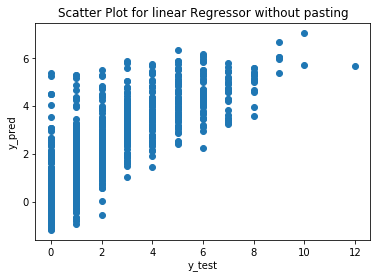

In [31]:
plt.scatter(y_test, y_pred_l_reg_2)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Scatter Plot for linear Regressor without pasting")

# Pasting for KNN Regressor

In [32]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

#step 1: split
y = df["children"]
X = df.drop(["children", "ceb"], 1)
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42)

#step 2: scale
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)


knn = KNeighborsRegressor()
bag_reg_1 = BaggingRegressor(knn, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_reg_1.fit(X_train, y_train)
y_pred_bag_1 = bag_reg_1.predict(X_test)


In [33]:
from sklearn import metrics

print("Mean Squared error: ", metrics.mean_squared_error(y_test, y_pred_bag_1))

Mean Squared error:  2.1552372333638865


In [34]:
print("R-Square score: ", metrics.r2_score(y_test, y_pred_bag_1))

R-Square score:  0.5434451399480041


In [35]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("R-Square score: ", metrics.r2_score(y_test,y_pred_knn))

R-Square score:  0.5322153217068668


Text(0.5, 1.0, 'Scatter Plot for Knn Regressor with Pasting')

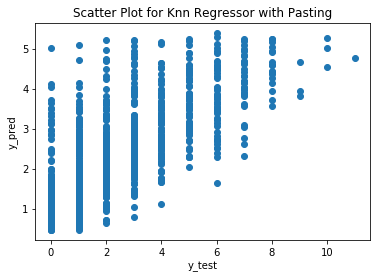

In [36]:
plt.scatter(y_test, y_pred_bag_1)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Scatter Plot for Knn Regressor with Pasting")

Text(0.5, 1.0, 'Scatter Plot for Knn Regressor without pasting')

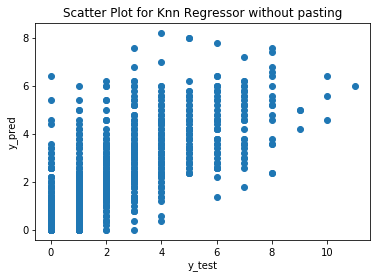

In [37]:
plt.scatter(y_test, y_pred_knn)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Scatter Plot for Knn Regressor without pasting")

# Ada Boosting

In [38]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

knn = KNeighborsRegressor()

from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(knn, n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)


0.4142115142557203

In [39]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

from  sklearn.linear_model import Ridge
ridge = Ridge()

from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(ridge, n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)


0.616566123251032

# Gradient Boosting

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.701
Accuracy on test set: 0.650


# Deep Learning Models

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org.astype(float))
X_test = scaler.transform(X_test_org.astype(float))

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(0)

In [43]:
#step 1: build the model
model = Sequential()
#input layer
model.add(Dense(10, input_dim = 18, activation = 'sigmoid'))
#hidden layers
model.add(Dense(5, activation = 'relu'))
#output layer
model.add(Dense(1, activation = 'sigmoid'))

#step 2: build the computational graph - compile
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#step 3: train the model
model.fit(X_train, y_train, epochs = 100, batch_size= 20)

#step 4: evaluate

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
3270/3270 [==============================] - 0s 122us/sample - loss: -2.5694 - acc: 0.2101
Epoch 2/100
3270/3270 [==============================] - 0s 121us/sample - loss: -10.8701 - acc: 0.2101
Epoch 3/100
3270/3270 [==============================] - 0s 119us/sample - loss: -19.7947 - acc: 0.2101
Epoch 4/100
3270/3270 [==============================] - 0s 119us/sample - loss: -20.0224 - acc: 0.2101
Epoch 5/100
3270/3270 [==============================] - 0s 120us/sample - loss: -20.0420 - acc: 0.2101
Epoch 6/100
3270/3270 [==============================] - 0s 117us/sample - loss: -20.1099 - acc: 0.2101
Epoch 7/100
3270/3270 [==============================] - 0s 124us/sample - loss: -20.2181 - acc: 0.2101
Epoch 8/100
3270/3270 [==============================] - 0s 138us/sample - loss: -20.3649 - acc: 0.2101
Epoch 9/100
3270/3270 [==========================

3270/3270 [==============================] - 0s 122us/sample - loss: -22.9029 - acc: 0.3385
Epoch 74/100
3270/3270 [==============================] - 0s 117us/sample - loss: -22.9043 - acc: 0.3382
Epoch 75/100
3270/3270 [==============================] - 0s 126us/sample - loss: -22.9077 - acc: 0.3407
Epoch 76/100
3270/3270 [==============================] - 0s 143us/sample - loss: -22.9100 - acc: 0.3413
Epoch 77/100
3270/3270 [==============================] - 0s 125us/sample - loss: -22.9121 - acc: 0.3388
Epoch 78/100
3270/3270 [==============================] - 0s 128us/sample - loss: -22.9127 - acc: 0.3407
Epoch 79/100
3270/3270 [==============================] - 0s 118us/sample - loss: -22.9170 - acc: 0.3410
Epoch 80/100
3270/3270 [==============================] - 0s 127us/sample - loss: -22.9175 - acc: 0.3398
Epoch 81/100
3270/3270 [==============================] - 0s 119us/sample - loss: -22.9207 - acc: 0.3419
Epoch 82/100
3270/3270 [==============================] - 0s 124us/s

In [44]:
model.evaluate(X_train, y_train)

3270/3270 [==============================] - 0s 71us/sample - loss: -22.9412 - acc: 0.3425


[-22.941191752022558, 0.34250763]

In [45]:
model.evaluate(X_test, y_test)

1091/1091 [==============================] - 0s 43us/sample - loss: -23.6296 - acc: 0.3190


[-23.629603070364865, 0.31897342]

# PCA

Please find PCA in another ipython file that is enclosed.

# Classification

Motivation : To predict whether a child is enrolled in school.This data comes from Wooldridge2.db database.The dataset has 3010 observations on 33 variables with 353 missing variables.We have processed all features.!

# Hard voting Classifier

In [46]:
import sqlite3
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
con = sqlite3.connect("wooldridge2.db")

In [48]:
df = pd.read_sql('SELECT * FROM "card";', con)

In [49]:
'''A data.frame with 3010 observations on 33 variables:

id: person identifier
nearc2: =1 if near 2 yr college, 1966
nearc4: =1 if near 4 yr college, 1966
educ: years of schooling, 1976
age: in years
fatheduc: father's schooling
motheduc: mother's schooling
weight: NLS sampling weight, 1976
momdad14: =1 if live with mom, dad at 14
sinmom14: =1 if with single mom at 14
step14: =1 if with step parent at 14
reg661: =1 for region 1, 1966
reg662: =1 for region 2, 1966
reg663: =1 for region 3, 1966
reg664: =1 for region 4, 1966
reg665: =1 for region 5, 1966
reg666: =1 for region 6, 1966
reg667: =1 for region 7, 1966
reg668: =1 for region 8, 1966
reg669: =1 for region 9, 1966
south66: =1 if in south in 1966
black: =1 if black
smsa: =1 in in SMSA, 1976
south: =1 if in south, 1976
smsa66: =1 if in SMSA, 1966
wage: hourly wage in cents, 1976
enroll: =1 if enrolled in school, 1976
KWW: knowledge world of work score
IQ: IQ score
married: =1 if married, 1976
libcrd14: =1 if lib. card in home at 14
exper: age - educ - 6
lwage: log(wage)
expersq: exper^2
'''

"A data.frame with 3010 observations on 33 variables:\n\nid: person identifier\nnearc2: =1 if near 2 yr college, 1966\nnearc4: =1 if near 4 yr college, 1966\neduc: years of schooling, 1976\nage: in years\nfatheduc: father's schooling\nmotheduc: mother's schooling\nweight: NLS sampling weight, 1976\nmomdad14: =1 if live with mom, dad at 14\nsinmom14: =1 if with single mom at 14\nstep14: =1 if with step parent at 14\nreg661: =1 for region 1, 1966\nreg662: =1 for region 2, 1966\nreg663: =1 for region 3, 1966\nreg664: =1 for region 4, 1966\nreg665: =1 for region 5, 1966\nreg666: =1 for region 6, 1966\nreg667: =1 for region 7, 1966\nreg668: =1 for region 8, 1966\nreg669: =1 for region 9, 1966\nsouth66: =1 if in south in 1966\nblack: =1 if black\nsmsa: =1 in in SMSA, 1976\nsouth: =1 if in south, 1976\nsmsa66: =1 if in SMSA, 1966\nwage: hourly wage in cents, 1976\nenroll: =1 if enrolled in school, 1976\nKWW: knowledge world of work score\nIQ: IQ score\nmarried: =1 if married, 1976\nlibcrd14: 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

In [51]:
df.head()

,index,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,...,smsa,south,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper
0,0,2,0,0,7,29,NaN,NaN,158413,1,...,1,0,1,548,0,15.0,NaN,1.0,0.0,16
1,1,3,0,0,12,27,8.0,8.0,380166,1,...,1,0,1,481,0,35.0,93.0,1.0,1.0,9
2,2,4,0,0,12,34,14.0,12.0,367470,1,...,1,0,1,721,0,42.0,103.0,1.0,1.0,16
3,3,5,1,1,11,27,11.0,12.0,380166,1,...,1,0,1,250,0,25.0,88.0,1.0,1.0,10
4,4,6,1,1,12,34,8.0,7.0,367470,1,...,1,0,1,729,0,34.0,108.0,1.0,0.0,16


In [52]:
#coverting into categories
df["nearc2"] = df["nearc2"].astype("category")
df["nearc4"] = df["nearc4"].astype("category")
df["momdad14"] = df["momdad14"].astype("category")
df["sinmom14"] = df["sinmom14"].astype("category")
df["step14"] = df["step14"].astype("category")
df["reg661"] = df["reg661"].astype("category")
df["reg662"] = df["reg662"].astype("category")
df["reg663"] = df["reg663"].astype("category")
df["reg664"] = df["reg664"].astype("category")
df["reg665"] = df["reg665"].astype("category")
df["reg666"] = df["reg666"].astype("category")
df["reg667"] = df["reg667"].astype("category")
df["reg668"] = df["reg668"].astype("category")
df["reg669"] = df["reg669"].astype("category")
df["south66"] = df["south66"].astype("category")
df["black"] = df["black"].astype("category")
df["smsa"] = df["smsa"].astype("category")
df["south"] = df["south"].astype("category")
df["smsa66"] = df["smsa66"].astype("category")
df["enroll"] = df["enroll"].astype("category")
df["married"] = df["married"].astype("category")
df["libcrd14"] = df["libcrd14"].astype("category")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 33 columns):
index       3010 non-null int64
id          3010 non-null int64
nearc2      3010 non-null category
nearc4      3010 non-null category
educ        3010 non-null int64
age         3010 non-null int64
fatheduc    2320 non-null float64
motheduc    2657 non-null float64
weight      3010 non-null int64
momdad14    3010 non-null category
sinmom14    3010 non-null category
step14      3010 non-null category
reg661      3010 non-null category
reg662      3010 non-null category
reg663      3010 non-null category
reg664      3010 non-null category
reg665      3010 non-null category
reg666      3010 non-null category
reg667      3010 non-null category
reg668      3010 non-null category
reg669      3010 non-null category
south66     3010 non-null category
black       3010 non-null category
smsa        3010 non-null category
south       3010 non-null category
smsa66      3010 non-null category


In [54]:
df.isnull().sum()

index         0
id            0
nearc2        0
nearc4        0
educ          0
age           0
fatheduc    690
motheduc    353
weight        0
momdad14      0
sinmom14      0
step14        0
reg661        0
reg662        0
reg663        0
reg664        0
reg665        0
reg666        0
reg667        0
reg668        0
reg669        0
south66       0
black         0
smsa          0
south         0
smsa66        0
wage          0
enroll        0
KWW          47
IQ          949
married       7
libcrd14     13
exper         0
dtype: int64

In [55]:
df=df.fillna(df.median())

In [56]:
df.columns

Index(['index', 'id', 'nearc2', 'nearc4', 'educ', 'age', 'fatheduc',
       'motheduc', 'weight', 'momdad14', 'sinmom14', 'step14', 'reg661',
       'reg662', 'reg663', 'reg664', 'reg665', 'reg666', 'reg667', 'reg668',
       'reg669', 'south66', 'black', 'smsa', 'south', 'smsa66', 'wage',
       'enroll', 'KWW', 'IQ', 'married', 'libcrd14', 'exper'],
      dtype='object')

# Voting Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
y = df["enroll"]
X = df.drop(["enroll"], 1)
X_train_org , X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [58]:
log_clf_hard = LogisticRegression()
log_clf_hard.fit(X_train, y_train)
knn_clf_hard = KNeighborsClassifier(7)
knn_clf_hard.fit(X_train, y_train)
svm_clf_hard = SVC(C = 10, probability = True)
svm_clf_hard.fit(X_train, y_train)

voting_clf_hard = VotingClassifier(estimators=[('lr', log_clf_hard), ('knn', knn_clf_hard), ('svc', svm_clf_hard)], voting='hard')
voting_clf_hard.fit(X_train, y_train)

print("Accuracy Scores: ")
from sklearn.metrics import accuracy_score
for clf in (log_clf_hard, knn_clf_hard, svm_clf_hard, voting_clf_hard):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Scores: 
LogisticRegression 0.893687707641196


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier 0.8953488372093024
SVC 0.893687707641196


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier 0.8953488372093024


In [59]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ")
for clf in (log_clf_hard, knn_clf_hard, svm_clf_hard, voting_clf_hard):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
LogisticRegression
[[538   1]
 [ 63   0]]


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier
[[539   0]
 [ 63   0]]
SVC
[[536   3]
 [ 61   2]]


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier
[[539   0]
 [ 63   0]]


In [60]:
from sklearn.metrics import classification_report
print("Classification Report is: ")
for clf in (log_clf_hard, knn_clf_hard, svm_clf_hard, voting_clf_hard):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(classification_report(y_test, y_pred))

Classification Report is: 
LogisticRegression
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.89       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.89      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       539
           1       0.40      0.03      0.06        63

    accuracy                           0.89       602
   macro avg       0.65      0.51      0.50       602
weighted avg       0.85      0.89      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Soft voting classifier

In [61]:
log_clf_soft = LogisticRegression()
log_clf_soft.fit(X_train, y_train)
knn_clf_soft = KNeighborsClassifier(7)
knn_clf_soft.fit(X_train, y_train)
svm_clf_soft = SVC(C = 10, probability = True)
svm_clf_soft.fit(X_train, y_train)

voting_clf_soft = VotingClassifier(estimators=[('lr', log_clf_soft), ('knn', knn_clf_soft), ('svc', svm_clf_soft)], voting='soft')
voting_clf_soft.fit(X_train, y_train)

print("Accuracy Scores: ")
from sklearn.metrics import accuracy_score
for clf in (log_clf_soft, knn_clf_soft, svm_clf_soft, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Scores: 
LogisticRegression 0.893687707641196


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier 0.8953488372093024
SVC 0.893687707641196


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier 0.8953488372093024


In [62]:
print("Confusion Matrix: ")
for clf in (log_clf_soft, knn_clf_soft, svm_clf_soft, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
LogisticRegression
[[538   1]
 [ 63   0]]


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier
[[539   0]
 [ 63   0]]
SVC
[[536   3]
 [ 61   2]]


c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier
[[539   0]
 [ 63   0]]


In [63]:
print("Classification Report is: ")
for clf in (log_clf_soft, knn_clf_soft, svm_clf_soft, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(classification_report(y_test, y_pred))

Classification Report is: 
LogisticRegression
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.89       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.89      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       539
           1       0.40      0.03      0.06        63

    accuracy                           0.89       602
   macro avg       0.65      0.51      0.50       602
weighted avg       0.85      0.89      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Bagging with Decision Tree Classifier

In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

dt_clf_1 = DecisionTreeClassifier(random_state=0)
bag_clf_1 = BaggingClassifier(dt_clf_1, n_estimators=100, max_samples=100, bootstrap=True, random_state=0)

bag_clf_1.fit(X_train, y_train)
y_pred_bag_1 = bag_clf_1.predict(X_test)

In [65]:
from  sklearn.metrics import accuracy_score
print("Accuracy Score: ", accuracy_score(y_test, y_pred_bag_1))

Accuracy Score:  0.8953488372093024


In [66]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test, y_pred_bag_1))

Confusion Matrix is: 
[[539   0]
 [ 63   0]]


In [67]:
print("Classification Report is: ")
print(classification_report(y_test, y_pred_bag_1))

Classification Report is: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
bag_clf_1.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf_1.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_1.score(X_test, y_test)))

Train score: 0.91
Test score: 0.90


In [69]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_tree))

Accuracy Score:  0.8388704318936877


In [70]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test, y_pred_tree))

Confusion Matrix is: 
[[491  48]
 [ 49  14]]


# Bagging with KNN Classifier

In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf_2 = KNeighborsClassifier(7)
bag_clf_2 = BaggingClassifier(knn_clf_2, n_estimators=100, max_samples=100, bootstrap=True, random_state=0)

bag_clf_2.fit(X_train, y_train)
y_pred_bag_2 = bag_clf_2.predict(X_test)

In [72]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_bag_2))

0.8953488372093024


In [73]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test, y_pred_bag_2))

Confusion Matrix is: 
[[539   0]
 [ 63   0]]


In [74]:
print("Classification Report is: ")
print(classification_report(y_test, y_pred_bag_2))

Classification Report is: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
bag_clf_2.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf_2.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_2.score(X_test, y_test)))

Train score: 0.91
Test score: 0.90


In [76]:
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_knn))

0.8953488372093024


In [77]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test, y_pred_knn))

Confusion Matrix is: 
[[539   0]
 [ 63   0]]


# Pasting with Decision Tree Classifier

In [78]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

dt_clf_1 = DecisionTreeClassifier(random_state=0)
bag_clf_1 = BaggingClassifier(dt_clf_1, n_estimators=100, max_samples=100, bootstrap=False, random_state=0)

bag_clf_1.fit(X_train, y_train)
y_pred_bag_1 = bag_clf_1.predict(X_test)

In [79]:
from  sklearn.metrics import accuracy_score
print("Accuracy Score: ", accuracy_score(y_test, y_pred_bag_1))

Accuracy Score:  0.893687707641196


In [80]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test, y_pred_bag_1))

Confusion Matrix is: 
[[538   1]
 [ 63   0]]


In [81]:
print("Classification Report is: ")
print(classification_report(y_test, y_pred_bag_1))

Classification Report is: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.89       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.89      0.85       602



In [82]:
bag_clf_1.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf_1.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_1.score(X_test, y_test)))

Train score: 0.91
Test score: 0.89


In [83]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_tree))

Accuracy Score:  0.8388704318936877


In [84]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test, y_pred_tree))

Confusion Matrix is: 
[[491  48]
 [ 49  14]]


# Pasting with KNN Classifier

In [85]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf_2 = KNeighborsClassifier(7)
bag_clf_2 = BaggingClassifier(knn_clf_2, n_estimators=100, max_samples=100, bootstrap= False, random_state=0)

bag_clf_2.fit(X_train, y_train)
y_pred_bag_2 = bag_clf_2.predict(X_test)

In [86]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_bag_2))

0.8953488372093024


In [87]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test, y_pred_bag_2))

Confusion Matrix is: 
[[539   0]
 [ 63   0]]


In [88]:
print("Classification Report is: ")
print(classification_report(y_test, y_pred_bag_2))

Classification Report is: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
bag_clf_2.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf_2.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_2.score(X_test, y_test)))

Train score: 0.91
Test score: 0.90


In [90]:
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_knn))

0.8953488372093024


In [91]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test, y_pred_knn))

Confusion Matrix is: 
[[539   0]
 [ 63   0]]


# Ada boosting with Decision Tree Classifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier


ada_clf_1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf_1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [93]:
from  sklearn.metrics import accuracy_score

y_pred = ada_clf_1.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8953488372093024


In [94]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix is: 
[[535   4]
 [ 59   4]]


In [95]:
print("Classification Report is: ")
print(classification_report(y_test, y_pred))

Classification Report is: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       539
           1       0.50      0.06      0.11        63

    accuracy                           0.90       602
   macro avg       0.70      0.53      0.53       602
weighted avg       0.86      0.90      0.86       602



In [96]:
ada_clf_1.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_clf_1.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf_1.score(X_test, y_test)))

Train score: 0.92
Test score: 0.90


# Ada boosting with Logistic Regression

In [97]:
from sklearn.ensemble import AdaBoostClassifier


ada_clf_2 = AdaBoostClassifier(LogisticRegression(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf_2.fit(X_train, y_train)

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.5, n_estimators=200, random_state=0)

In [98]:
from  sklearn.metrics import accuracy_score

y_pred = ada_clf_2.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.893687707641196


In [99]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix is: 
[[538   1]
 [ 63   0]]


In [100]:
print("Classification Report is: ")
print(classification_report(y_test, y_pred))

Classification Report is: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.89       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.89      0.85       602



In [101]:
ada_clf_2.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_clf_2.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf_2.score(X_test, y_test)))

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday ku

c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train score: 0.91
Test score: 0.89


# Gradient Boosting

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.936
Accuracy on test set: 0.885


In [103]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.913
Accuracy on test set: 0.897


In [104]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.914
Accuracy on test set: 0.895


In [105]:
from  sklearn.metrics import accuracy_score

y_pred = gbrt.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8953488372093024


In [106]:
print("Confusion Matrix is: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix is: 
[[539   0]
 [ 63   0]]


In [107]:
print("Classification Report is: ")
print(classification_report(y_test, y_pred))

Classification Report is: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       539
           1       0.00      0.00      0.00        63

    accuracy                           0.90       602
   macro avg       0.45      0.50      0.47       602
weighted avg       0.80      0.90      0.85       602



c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\uday kumar reddy\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# PCA


Please find PCA another ipython file which is enclose

# Deep Learning

In [108]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(0)

In [109]:
#step 1: build the model
model = Sequential()
#input layer
model.add(Dense(10, input_dim =32 , activation = 'sigmoid'))
#hidden layers
model.add(Dense(5, activation = 'relu'))
#output layer
model.add(Dense(1, activation = 'sigmoid'))

#step 2: build the computational graph - compile
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#step 3: train the model
model.fit(X_train, y_train, epochs = 100, batch_size= 20)

#step 4: evaluate

Epoch 1/100
2408/2408 [==============================] - 1s 286us/sample - loss: 0.5878 - acc: 0.7222
Epoch 2/100
2408/2408 [==============================] - 0s 127us/sample - loss: 0.3578 - acc: 0.9107
Epoch 3/100
2408/2408 [==============================] - 0s 126us/sample - loss: 0.3085 - acc: 0.9107
Epoch 4/100
2408/2408 [==============================] - 0s 125us/sample - loss: 0.2938 - acc: 0.9107
Epoch 5/100
2408/2408 [==============================] - 0s 127us/sample - loss: 0.2872 - acc: 0.9107
Epoch 6/100
2408/2408 [==============================] - 0s 125us/sample - loss: 0.2831 - acc: 0.9107
Epoch 7/100
2408/2408 [==============================] - 0s 125us/sample - loss: 0.2804 - acc: 0.9107
Epoch 8/100
2408/2408 [==============================] - 0s 124us/sample - loss: 0.2782 - acc: 0.9107
Epoch 9/100
2408/2408 [==============================] - 0s 126us/sample - loss: 0.2767 - acc: 0.9107
Epoch 10/100
2408/2408 [==============================] - 0s 126us/sample - loss: 

In [110]:
model.evaluate(X_train, y_train)

2408/2408 [==============================] - 0s 84us/sample - loss: 0.2390 - acc: 0.9153


[0.23897571393916772, 0.91528237]

In [111]:
model.evaluate(X_test, y_test)

602/602 [==============================] - 0s 43us/sample - loss: 0.3347 - acc: 0.8904


[0.33467386380778597, 0.8903654]

# Clearly gradient boosting outperformed all other models